In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [2]:
from data_structure.test import *

In [3]:
%%time
origin_result_df = deal_data()
# origin_result_df

Wall time: 10.1 s


In [4]:
hoRatio = 0.3
offset_day = 7
# offset_day_list = range(1, 40, 1)
k = 70
# k_list = range(2, 100, 1)

In [5]:
# %time
# %time ret = guess_price(origin_result_df, hoRatio=hoRatio, offset_day=offset_day, k=k)
# ret

In [6]:
%%time
# import time
# time.sleep(1)
from sklearn import neighbors
from sklearn import preprocessing
clf = neighbors.KNeighborsClassifier(
    n_neighbors=k, weights='uniform', algorithm='auto', leaf_size=1, p=2, metric='minkowski', metric_params=None, n_jobs=1)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='uniform')
Wall time: 54.5 ms


In [7]:
%%time

import itertools

# temp_df = origin_result_df.copy()
# temp_df = temp_df.reset_index(drop=False)
# temp_df['Close_change'] = '-'
# temp_df['inX_lable'] = 'CALCULATING'
# print(temp_df)

%time o_result_df = kNN.autoNorm(origin_result_df)
# print(result_df)
# %time X_normalized = preprocessing.normalize(origin_result_df, norm='l2')
# print(X_normalized)

result_list = []

offset_day_list = range(1, 2, 1)
k_list = range(101, 102, 1)

# for offset_day, k in itertools.product(offset_day_list, k_list):
for ndays in range(15):
    result_df = o_result_df.copy()
    result_df = result_df.reset_index(drop=False)
    result_df['Real'] = pd.np.nan
    # result_df['Close_change2'] = pd.np.nan

    # for i in range(0, len(result_df), 1):
    #     try:
    #         result_df.loc[i, 'Close_change'] = 'UP' if result_df.loc[i + offset_day, 'close'] > result_df.loc[i, 'close'] else 'DOWN'
    #         temp_df.loc[i, 'Close_change'] = result_df.loc[i, 'Close_change']
    #     except Exception as e:
    #         pass


#     result_df['Close_change'] = result_df.close[:len(result_df)-offset_day] - result_df.close[offset_day:].values
#     result_df['Close_change'] = result_df['Close_change'].apply(lambda x: 'UP' if x <=0 else 'DOWN')
#     result_df.loc[len(result_df)-offset_day: ,'Close_change'] = pd.np.nan
    
#     result_df['Close_change'] = result_df.open[1:len(result_df)-offset_day+1] - result_df.close[offset_day:].values
#     result_df.Close_change[0:len(result_df)-offset_day] = result_df.open[1:len(result_df)-offset_day+1].values - result_df.close[offset_day:].values
    
#     result_df.loc[:len(result_df)-offset_day, 'Real'] = \
#         (result_df.open[1:len(result_df)-offset_day+1] - result_df.close[offset_day:].values).reset_index(drop=True)
#     result_df['Real'] = result_df['Real'].apply(lambda x: 'UP' if x <=0 else 'DOWN')
#     result_df.loc[len(result_df)-offset_day: ,'Real'] = pd.np.nan
    
    for i in range(0, len(result_df)-ndays-1, 1):
        result_df.loc[i, 'Real'] = 'DOWN'
        for n in range(ndays+1):
#             if result_df.open[i+1] < result_df.close[i+1+n]:
            if result_df.close[i+1+n] > result_df.open[i+1] * 1.05:
                result_df.loc[i, 'Real'] = 'UP'
                continue

    result_df.dropna(inplace=True)
    # print(result_df)

    numTestVecs = int(hoRatio * len(result_df))
    inX_label = result_df.loc[:, 'Real']
    train_label = inX_label.loc[:len(result_df)-numTestVecs]
    sample_label = inX_label.loc[len(result_df)-numTestVecs:]

#     result_df = result_df.loc[:, ['close', 'volume', 'News_count', 'News_sentiment']]
#     result_df = result_df.loc[:, ['News_count', 'News_sentiment']]
    result_df = result_df.loc[:, ['volume', 'News_sentiment']]
    train_df = result_df.loc[:len(result_df)-numTestVecs]
    sample_df = result_df.loc[len(result_df)-numTestVecs:]

    clf = neighbors.KNeighborsClassifier(
        n_neighbors=k, weights='distance', algorithm='auto', leaf_size=1, p=2, metric='minkowski', metric_params=None, n_jobs=1)
    clf.fit(train_df, train_label)
    # prediction = clf.predict([(0.04380037, 0.17151515, 0, 0)])
    # print(prediction)
    # prediction = clf.predict(sample_df)
    # print(prediction)
    score = clf.score(sample_df, sample_label)
    # print(score)
    result_list.append((score, ndays, k, offset_day, clf))

# print(sorted(result_list)[::-1][:10])
for item in sorted(result_list)[::-1][:10]:
    print(item)

Wall time: 86.6 ms
(0.96385542168674698, 0, 70, 7, KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='distance'))
(0.86345381526104414, 1, 70, 7, KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='distance'))
(0.79032258064516125, 2, 70, 7, KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='distance'))
(0.72580645161290325, 3, 70, 7, KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='distance'))
(0.67741935483870963, 4, 70, 7, KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=70, p=2,
           weights='dis

In [8]:
%%time

property_list = []

for score, ndays, k, offset_day, clf in sorted(result_list)[::-1][:10]:
    result_df = origin_result_df.copy()
    
#     result_df['inX_lable'] = o_result_df.apply(lambda x: clf.predict([x.loc[['close', 'volume', 'News_count', 'News_sentiment']].values])[0], axis=1)
#     result_df['inX_lable'] = o_result_df.apply(lambda x: clf.predict([x.loc[['volume', 'News_sentiment']].values])[0], axis=1)
    result_df['inX_lable'] = o_result_df.apply(
        lambda x: 'UP' if clf.predict_proba([x.loc[['volume', 'News_sentiment']].values])[0, 1] > 0.5 else 'DOWN', axis=1)

    result_df['win_rate'] = o_result_df.apply(lambda x: clf.predict_proba([x.loc[['volume', 'News_sentiment']].values])[0, 1], axis=1)

    result_df = result_df.reset_index(drop=False)
    
    result_df['Real'] = pd.np.nan
#     result_df.loc[:len(result_df)-offset_day, 'Real'] = \
#         (result_df.open[1:len(result_df)-offset_day+1] - result_df.close[offset_day:].values).reset_index(drop=True)
#     result_df['Real'] = result_df['Real'].apply(lambda x: 'UP' if x <=0 else 'DOWN')

    for i in range(0, len(result_df)-ndays-1, 1):
        result_df.loc[i, 'Real'] = 'DOWN'
        for n in range(ndays+1):
#             if result_df.open[i+1] < result_df.close[i+1+n]:
            if result_df.close[i+1+n] > result_df.open[i+1] * 1.1:
                result_df.loc[i, 'Real'] = 'UP'
                continue
    
    last_property, start_close, end_close, tf = trade_strategy_rise_after_ndays(result_df, ndays, offset_day, hoRatio, isReturnDetail=True)
    property_list.append((int(last_property), start_close, end_close, float(end_close / start_close), score, ndays, k, offset_day, tf))

for p in sorted(property_list)[::-1][:1]:
    print(p[:-1])
    print(p[-1].tail(300))
#     print(p[7])

(103131, 187.86000000000001, 231.41999999999999, 1.231874800383264, 0.44489795918367347, 12, 70, 7)
          date     open   close      volume  News_count  News_sentiment inX_lable  win_rate  Real  BUY  SELL       CASH  COIN   PROPERTY   PROFIT
532 2017-02-13  184.500  184.31   2428375.0         9.0        0.814265      DOWN  0.000000  DOWN    0     0  100000.00     0  100000.00     0.00
533 2017-02-14  184.010  182.77   1931951.0         9.0        0.892547      DOWN  0.000000  DOWN    0     0  100000.00     0  100000.00     0.00
534 2017-02-15  183.650  183.58   1203060.0        11.0        0.837721      DOWN  0.000000  DOWN    0     0  100000.00     0  100000.00     0.00
535 2017-02-16  183.620  184.94   2301492.0         4.0        0.999947      DOWN  0.000000  DOWN    0     0  100000.00     0  100000.00     0.00
536 2017-02-17  183.920  185.17   1623001.0         9.0        0.999992      DOWN  0.000000  DOWN    0     0  100000.00     0  100000.00     0.00
537 2017-02-21  185.230 

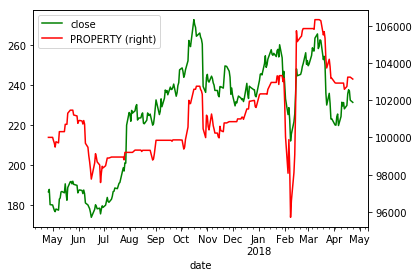

In [9]:
df = p[-1].copy()
# df['PROPERTY'] = df['PROPERTY']
df = df[582:]
ax = df.plot(kind='line', x='date', y='close', color='Green')
ax = df.plot(kind='line', x='date', y='PROPERTY', secondary_y=True, color='Red', ax=ax)